In [1]:
import pandas as pd
import numpy as np

# Задание 1
Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

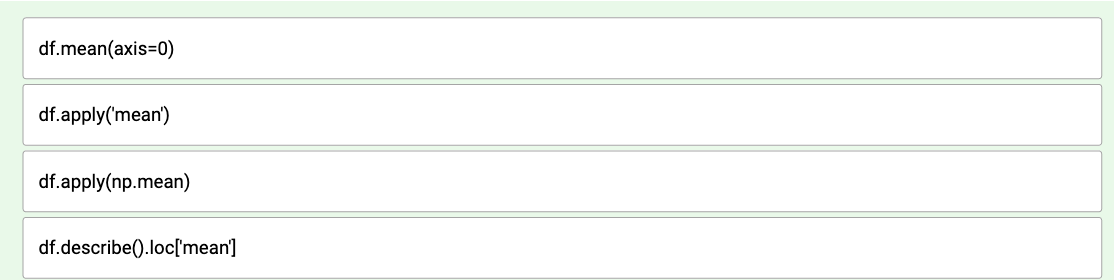

In [2]:
df = pd.read_csv('data/iris.csv')

In [13]:
%%timeit 
df.apply(np.mean)

1.12 ms ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit 
df.mean(axis=0)

637 µs ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit 
df.apply('mean')

707 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit 
df.describe().loc['mean']

13.8 ms ± 648 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Задание 2 
К вам попали наблюдения о числе перелетающих на зимовку стрижей, представленные в виде пандасовской серии wintering. В каждой ячейке указано число пролетевших птиц за этот день. Посчитайте с помощью expanding окна количество всех перелетевших птиц за всё время до данного и поместите в переменную total_birds.

In [ ]:
total_birds = wintering.expanding().sum()

# Задание 3

Соотнесите строчку кода и её эффект, df содержит DatetimeIndex


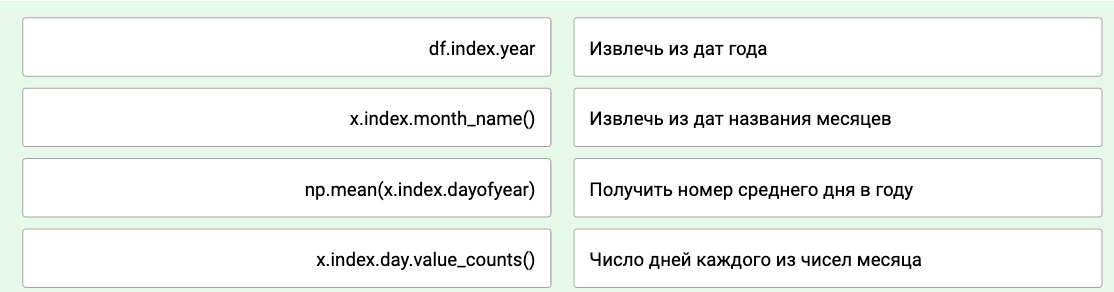

In [17]:
movie = pd.read_csv('data/archive.zip')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [18]:
budget = movie[["budget", "duration"]]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [19]:
print(budget.applymap(lambda x: x + 1).head())
%timeit budget.applymap(lambda x: x + 1)

        budget  duration
0  237000001.0     179.0
1  300000001.0     170.0
2  245000001.0     149.0
3  250000001.0     165.0
4          NaN       NaN
4.09 ms ± 450 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
print(budget.apply(lambda x: x + 1).head())
%timeit budget.applymap(lambda x: x + 1)

        budget  duration
0  237000001.0     179.0
1  300000001.0     170.0
2  245000001.0     149.0
3  250000001.0     165.0
4          NaN       NaN
4.62 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
print(budget.transform(lambda x: x + 1).head())
%timeit budget.transform(lambda x: x + 1)

        budget  duration
0  237000001.0     179.0
1  300000001.0     170.0
2  245000001.0     149.0
3  250000001.0     165.0
4          NaN       NaN
1.16 ms ± 93.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
print(budget.apply(np.mean))
%timeit budget.apply(np.mean)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64
918 µs ± 118 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
def mm(col):
    return np.mean(col) + 1

In [24]:
print(budget.apply(mm))
%timeit budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64
863 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
print(budget.mean() + 1)
%timeit budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64
818 µs ± 66.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
print(np.mean(budget["budget"].dropna().values))
%timeit np.mean(budget["budget"].dropna().values)

39752620.436387606
238 µs ± 60.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
print(budget["budget"].mean())
%timeit budget["budget"].mean()

39752620.436387606
114 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [28]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [29]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [32]:
stock.loc['2010-02'].size

95

In [33]:
stock.loc['2010-02':'2011-03'].size

1470

In [34]:
stock.resample('4h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 12:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 16:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 08:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 12:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN


In [35]:
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [36]:
stock.rolling(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [37]:
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [38]:
stock.expanding().mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [39]:
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [40]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


In [41]:
stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [42]:
stock.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [43]:
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [44]:
stock.index.dayofyear

Int64Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
            ...
            184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
           dtype='int64', name='Date', length=1896)

In [50]:
stock.index.isocalendar()

,year,week,day
Date,,,
2010-01-04,2010,1,1
2010-01-05,2010,1,2
2010-01-06,2010,1,3
2010-01-07,2010,1,4
2010-01-08,2010,1,5
...,...,...,...
2017-07-11,2017,28,2
2017-07-12,2017,28,3
2017-07-13,2017,28,4
